<a href="https://colab.research.google.com/github/lakummahesh/Supervised-ML-Capstone-Project-Classification-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
Data Description
Demographic:
• Sex: male or female("M" or "F")
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Mounting the drive and importing the data.

In [ ]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Learnings/AI ML Data Science/1. Alma Better/Colab Notebooks/Day 61.1 - Classification - Capstone Project/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

# Viewing the data.

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


# Cleaning the data.

In [ ]:
# Drop the id column as it is redundant data for our analysis
df.drop("id",axis=1,inplace=True)

In [ ]:
# Check and drop the duplicate entries in the data.
df.drop_duplicates(inplace=True)

In [ ]:
#Check for the Missing values in the dataset.
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

A few features as shown above do have missing values. We need to deal with these in order to make the data clean and usable for analysis.
We have tried two approaches for this.
1. Drop the data corresponding to missing values.
2. Replace the missing values with relevant data.

# Approach 1: Dropping the missing values:
The maximum amount of data missing is for the feature 'glucose'. It is 304, which is less than 10% of the total data. Hence, we may consider dropping the missing data as safe.

In [ ]:
# Creating a copy of the dataframe.
df1 = df.copy()

In [ ]:
# Dropping all the entries corresponding to the data with missing values.
df1.dropna(axis=0,inplace=True)

In [ ]:
# Checking the new shape of the dataset
df1.shape

(2927, 16)

In [ ]:
# Just confirming if all the missing data is dropped.
df1.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Approach 2: Replacing the missing values with relevant data:
To do this, first we create a copy of the original dataframe and then we check for the weightage of the categorical data in the dependent variable.

In [ ]:
df2 = df.copy()

In [ ]:
df2.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df2.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

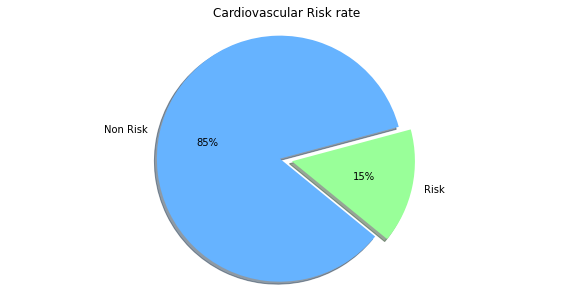

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['#66b3ff','#99ff99']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df2['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

This means that in the data, out of 3390 entries only 511 entries correspond to positive, i.e. indicating the Risk of Cardiovascular disease. This amounts to 15% of the total data. Which is quite less in proportion. Hence, before we drop the data with missing values, we need to look for the proportion of data corresponding to this class.

In [ ]:
# Total NaN values
nan_total = (df2.isnull().sum()).sum()
nan_total

510

In [ ]:
# Finding the percentage of weightage of each feature containing the missing values.
rnan_education = df2[(df2["TenYearCHD"]==1) & (df2.education.isnull())].shape
rnan_cigsPerDay = df2[(df2["TenYearCHD"]==1) & (df2.cigsPerDay.isnull())].shape
rnan_BPMeds = df2[(df2["TenYearCHD"]==1) & (df2.BPMeds.isnull())].shape
rnan_totChol = df2[(df2["TenYearCHD"]==1) & (df2.totChol.isnull())].shape
rnan_BMI = df2[(df2["TenYearCHD"]==1) & (df2.BMI.isnull())].shape
rnan_heartRate = df2[(df2["TenYearCHD"]==1) & (df2.heartRate.isnull())].shape
rnan_glucose = df2[(df2["TenYearCHD"]==1) & (df2.glucose.isnull())].shape

In [ ]:
# Sum up and add to get the total percentage:
rnan_total = rnan_education[0] + rnan_cigsPerDay[0] + rnan_BPMeds[0] + rnan_totChol[0] + rnan_BMI[0] + rnan_heartRate[0] + rnan_glucose[0]

In [ ]:
print(f'The total NaN values in the data are {nan_total} of which {rnan_total} corresponds to the Risk Class.')

The total NaN values in the data are 510 of which 75 corresponds to the Risk Class.


In [ ]:
# Finding percentage of data corresponding to Risk class:
print(f'The percentage of  NaN values in the data that  corresponds to the Risk Class is {rnan_total/3390*100}.')

The percentage of  NaN values in the data that  corresponds to the Risk Class is 2.2123893805309733.


This means that if we drop the NaN values, we will lose 2.21% of the data corresponding to the Risk class, which consists of just 15% of the entire data. Hecne, dropping this might impact the final results. Hence, we replace the data with relevant values.

In [ ]:
# Replacing the values:
# filling the null values with median and mode for numeric and categorical columns respectively
df2['glucose'] = df2['glucose'].fillna(df2['glucose'].median())
df2['education'] = df2['education'].fillna(df2['education'].mode()[0])
df2['BPMeds'].fillna(df2['BPMeds'].mode()[0],inplace = True)
df2['cigsPerDay'] = df2['cigsPerDay'].fillna(df2['cigsPerDay'].median())
df2['totChol'] = df2['totChol'].fillna(df2['totChol'].median())
df2['BMI'] = df2['BMI'].fillna(df2['BMI'].median())
df2['heartRate'] = df2['heartRate'].fillna(df2['heartRate'].median())

In [ ]:
# Just confirming if all the missing data is dropped.
df2.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Label Encoding:
Using One Hot Encoding for this.

In [ ]:
# Replacing categorical data with numeric.
df2['sex']= df2['sex'].apply(lambda x: 1 if x=='M' else 0)                  # M = 1, F = 0
df2['is_smoking']= df2['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)  # YES = 1, NO = 0

In [ ]:
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df2.columns if len(df2[i].unique())>5]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df2.columns if len(df2[i].unique())<5]

categorical_columns.remove('TenYearCHD') # dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


Creating variables containing the dependent and independent features.

In [ ]:
# Here, the feature 'TenYearCHD' is the dependent variable. Hence, listing out the dependent and independent variables for ease of analysis.
dependent_variable = 'TenYearCHD'

In [ ]:
independent_variables = categorical_columns + numerical_columns
independent_variables

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
# creating a dataframe of independent variables
independent_var_df = df2[independent_variables]
dependent_var_df = df2[dependent_variable]

In [ ]:
print(f'{independent_var_df.shape}, {dependent_var_df.shape}')

(3390, 15), (3390,)


# Dealing with the Outliers.

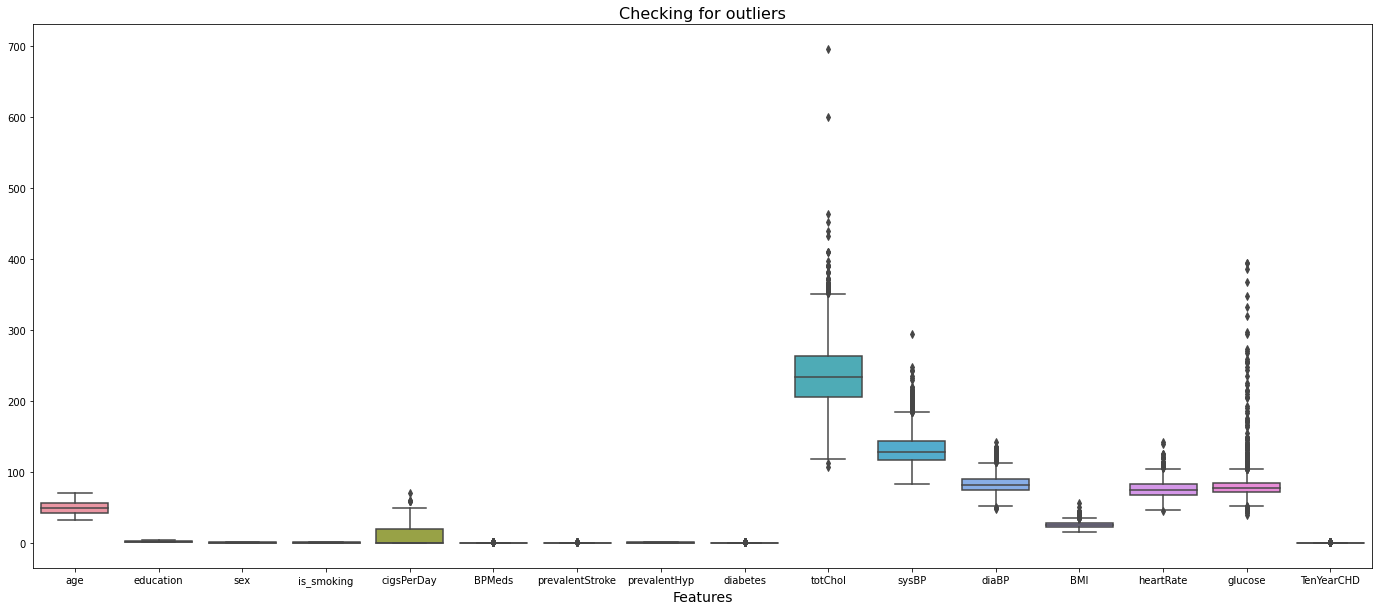

In [ ]:
plt.figure(figsize=(24,10))
sns.boxplot(data=df2)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features',size=14)
plt.show()

In [ ]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = df2[column].quantile(0.75)
    q1 = df2[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(df2[df2[column] > ul]['TenYearCHD'].value_counts())
    lower_removal = dict(df2[df2[column] < ll]['TenYearCHD'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(df2[df2[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df

In [ ]:
# Applying the function created
outlier_cal(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigsPerDay,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,totChol,351.00000,119.00000,"{0: 30, 1: 11}","{0: 1, 1: 1}",26.829268
2,sysBP,184.50000,76.50000,"{0: 64, 1: 41}",{},39.047619
3,diaBP,113.25000,51.25000,"{0: 32, 1: 23}","{1: 2, 0: 1}",41.818182
4,BMI,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
5,heartRate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
6,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000
